In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
from cycler import cycler

plt.rcParams.update({

    # ==== FIGURE ====
    "figure.figsize": (6, 3),
    "figure.dpi": 120,
    "figure.facecolor": "white",
    "figure.titlesize": 16,          # match axes title
    "figure.titleweight": "bold",    # match axes title
    "figure.autolayout": True,

    # ==== FONT & TEXT ====
    "font.family": ["Roboto", "DejaVu Sans"],
    "text.color": "#2C2C2C",

    # ==== AXES ====
    "axes.facecolor": "#FAFAFA",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "axes.titlepad": 12,
    "axes.titlecolor": "#444444",
    "axes.labelsize": 14,
    "axes.labelcolor": "#2C2C2C",
    "axes.edgecolor": "#555555",
    "axes.linewidth": 0.8,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.grid": True,
    "axes.prop_cycle": cycler(color=[
        "#4E79A7", "#F28E2B", "#59A14F", "#E15759", "#B07AA1",
        "#9C755F", "#FF9DA7", "#8C8C8C", "#EDC948", "#76B7B2"
    ]),

    # ==== GRID ====
    "grid.alpha": 0.25,
    "grid.color": "#BBBBBB",
    "grid.linestyle": "--",

    # ==== TICKS ====
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.color": "#333333",
    "ytick.color": "#333333",
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,

    # ==== LEGEND ====
    "legend.fontsize": 12,
    "legend.frameon": True,
    "legend.framealpha": 0.85,
    "legend.facecolor": "white",
    "legend.edgecolor": "#DDDDDD",
    "legend.fancybox": True,
    "legend.shadow": False,

    # ==== LINES ====
    "lines.linewidth": 2.2,
    "lines.markersize": 6,
    "lines.markeredgewidth": 0.8
})

In [57]:
data = pd.read_csv('smart_meter_data.csv')
data.head()

,Timestamp,Electricity_Consumed,Temperature,Humidity,Wind_Speed,Avg_Past_Consumption,Anomaly_Label
0,2024-01-01 00:00:00,0.457786,0.469524,0.396368,0.445441,0.692057,Normal
1,2024-01-01 00:30:00,0.351956,0.465545,0.451184,0.458729,0.539874,Normal
2,2024-01-01 01:00:00,0.482948,0.285415,0.408289,0.470360,0.614724,Normal
3,2024-01-01 01:30:00,0.628838,0.482095,0.512308,0.576241,0.757044,Normal
4,2024-01-01 02:00:00,0.335974,0.624741,0.672021,0.373004,0.673981,Normal


In [58]:
print(data.shape)

(5000, 7)


In [59]:
print(data.isnull().sum())

Timestamp               0
Electricity_Consumed    0
Temperature             0
Humidity                0
Wind_Speed              0
Avg_Past_Consumption    0
Anomaly_Label           0
dtype: int64


In [60]:
print(any(data.duplicated()))

False


In [61]:
data.Anomaly_Label.value_counts()

Anomaly_Label
Normal      4750
Abnormal     250
Name: count, dtype: int64

In [62]:
data['Anomaly'] = data.Anomaly_Label.map({'Normal': 0, 'Abnormal': 1})

print(data.Anomaly.value_counts())

data_copy_1 = data.drop(['Anomaly_Label'], axis=1)
data_copy_1.head()

Anomaly
0    4750
1     250
Name: count, dtype: int64


,Timestamp,Electricity_Consumed,Temperature,Humidity,Wind_Speed,Avg_Past_Consumption,Anomaly
0,2024-01-01 00:00:00,0.457786,0.469524,0.396368,0.445441,0.692057,0
1,2024-01-01 00:30:00,0.351956,0.465545,0.451184,0.458729,0.539874,0
2,2024-01-01 01:00:00,0.482948,0.285415,0.408289,0.470360,0.614724,0
3,2024-01-01 01:30:00,0.628838,0.482095,0.512308,0.576241,0.757044,0
4,2024-01-01 02:00:00,0.335974,0.624741,0.672021,0.373004,0.673981,0


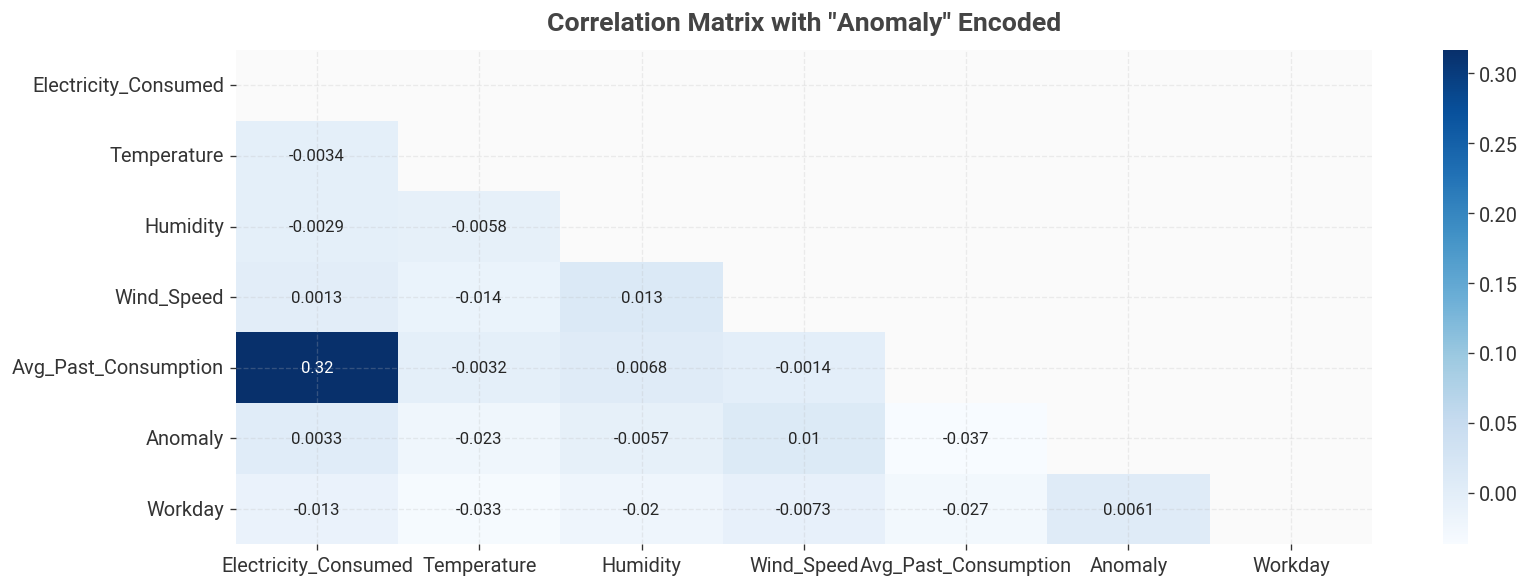

In [187]:
correlation_matrix = data_copy_1.drop(['Timestamp'], axis=1).corr()

plt.figure(figsize=(14, 5))
sns.heatmap(correlation_matrix, annot=True, mask=np.triu(np.ones_like(correlation_matrix)), cmap='Blues')
plt.title('Correlation Matrix with "Anomaly" Encoded');

In [64]:
date_series = pd.to_datetime(data.Timestamp)
print(date_series.head(5))

0   2024-01-01 00:00:00
1   2024-01-01 00:30:00
2   2024-01-01 01:00:00
3   2024-01-01 01:30:00
4   2024-01-01 02:00:00
Name: Timestamp, dtype: datetime64[ns]


In [65]:
print(date_series.dt.weekday.value_counts())

workday = ( date_series.dt.weekday < 5 ).astype(int)

Timestamp
0    720
1    720
2    720
3    720
4    720
5    720
6    680
Name: count, dtype: int64


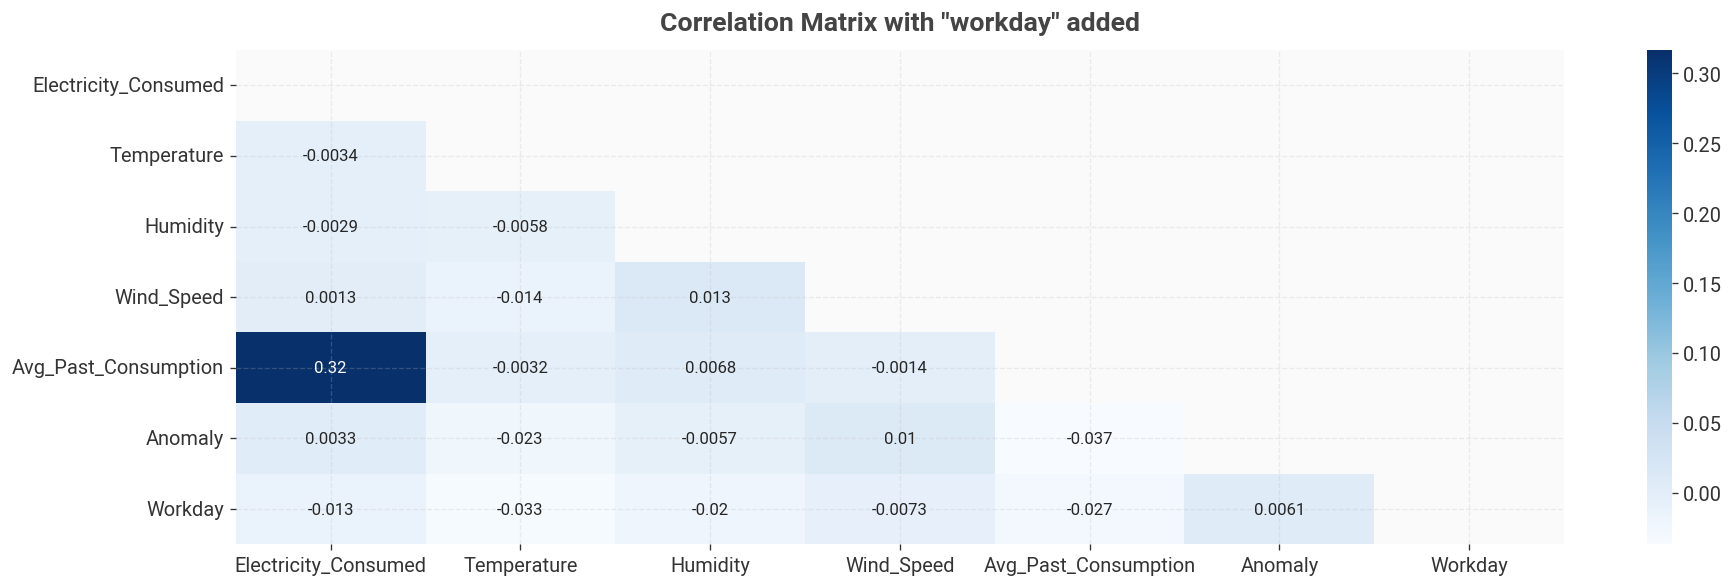

In [188]:
data_copy_1['Workday'] = workday

correlation_matrix = data_copy_1.drop(['Timestamp'], axis=1).corr()

plt.figure(figsize=(16, 5))
sns.heatmap( data_copy_1.drop('Timestamp', axis=1).corr(), annot=True, cmap='Blues', mask=np.triu(np.ones_like(correlation_matrix)))
plt.title('Correlation Matrix with "workday" added');

In [67]:
time_series = date_series.dt.time

print(type(time_series))
print(type(time_series[0]))

# Convert to hour integers
hours = date_series.dt.hour

def convert(hour: int) -> str:
    if 0 <= hour < 6:
        return 'Late_Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'After_Noon'
    elif 18 <= hour < 24:
        return 'Early_Night'
    else:
        return 'BAA'
    
day_part = hours.apply(convert)
print(day_part.value_counts())

<class 'pandas.core.series.Series'>
<class 'datetime.time'>
Timestamp
Late_Night     1256
Morning        1248
After_Noon     1248
Early_Night    1248
Name: count, dtype: int64


In [68]:
# data_copy_1['Day_Part'] = hours.apply(convert)
# data_copy_1.sample(5, random_state=42)

In [69]:
day_part_ohe = pd.get_dummies(day_part, prefix='day_part', dtype=int)
day_part_ohe.sample(5, random_state=42)

,day_part_After_Noon,day_part_Early_Night,day_part_Late_Night,day_part_Morning
1501,0,0,0,1
2586,0,1,0,0
2653,0,0,0,1
1055,0,1,0,0
705,1,0,0,0


In [170]:
data_copy_2 = pd.concat( [data_copy_1, day_part_ohe], axis=1 )

In [171]:
data_copy_2.sample(5, random_state=42)


,Timestamp,Electricity_Consumed,Temperature,Humidity,Wind_Speed,Avg_Past_Consumption,Anomaly,Workday,day_part_After_Noon,day_part_Early_Night,day_part_Late_Night,day_part_Morning
1501,2024-02-01 06:30:00,0.283136,0.363988,0.557851,0.574558,0.850957,1,1,0,0,0,1
2586,2024-02-23 21:00:00,0.155125,0.386928,0.704744,0.365213,0.651421,0,1,0,1,0,0
2653,2024-02-25 06:30:00,0.546763,0.591185,0.552238,0.302088,0.426179,0,0,0,0,0,1
1055,2024-01-22 23:30:00,0.263063,0.727734,0.386598,0.398739,0.513191,0,1,0,1,0,0
705,2024-01-15 16:30:00,0.476002,0.246476,0.392256,0.629530,0.323443,0,1,1,0,0,0


# <center> Logistic Regression </center>

In [79]:
features = data_copy_2.drop(['Timestamp', 'Anomaly'], axis=1)
target = data_copy_2['Anomaly']

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25,
                                                    shuffle=True, stratify=target, random_state=42)
print(target.value_counts())

Anomaly
0    4750
1     250
Name: count, dtype: int64


In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
}

grid = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    cv=5, 
    scoring='recall',
)

grid.fit(X_train, y_train)

grid.best_params_

{'C': 0.001}

In [116]:
logistic = LogisticRegression(C=0.001, class_weight='balanced').fit(X_train, y_train)
predictions = logistic.predict(X_test)

pd.Series( predictions ).value_counts() 

0    670
1    580
Name: count, dtype: int64

              precision    recall  f1-score   support

           0       0.96      0.54      0.69      1188
           1       0.06      0.53      0.10        62

    accuracy                           0.54      1250
   macro avg       0.51      0.54      0.40      1250
weighted avg       0.91      0.54      0.66      1250



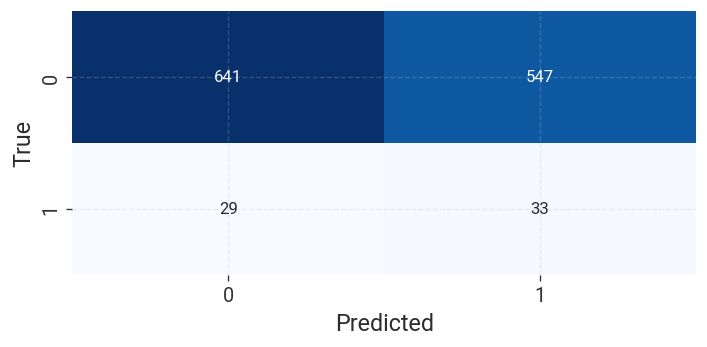

In [193]:
from sklearn.metrics import confusion_matrix, classification_report

conf_mat = confusion_matrix(y_test, predictions)

sns.heatmap(conf_mat, cmap='Blues', annot=True, cbar=False, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

print(classification_report(y_test, predictions))

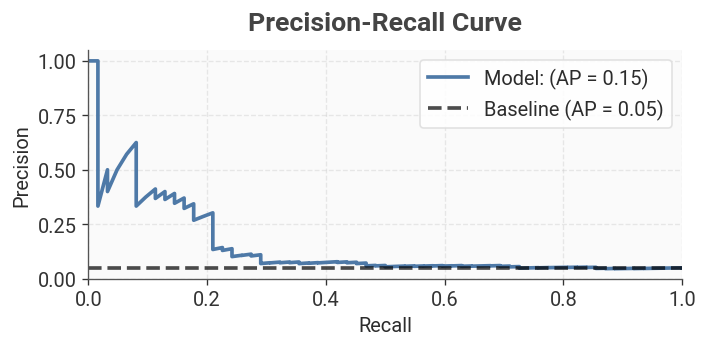

In [194]:
import sys
sys.path.append('../../')
from my_utils.classification_eval_plots import ClassificationEvaluationPlots

ClassificationEvaluationPlots.plot_precision_recall_curve(y_test, logistic.predict_proba(X_test)[:, 1])

# <center> Gradient Boosting </center>

In [162]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost = GradientBoostingClassifier(
    n_estimators=300,       # more trees
    learning_rate=0.05,     # smaller step size
    max_depth=3,            # shallower trees → less memorization
    min_samples_leaf=5,     # stops tiny splits
).fit(X_train, y_train)
predictions_gb = grad_boost.predict(X_test)

pd.Series( predictions_gb ).value_counts()

0    1192
1      58
Name: count, dtype: int64

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1188
           1       0.98      0.92      0.95        62

    accuracy                           1.00      1250
   macro avg       0.99      0.96      0.97      1250
weighted avg       1.00      1.00      1.00      1250

[[1187    1]
 [   5   57]]


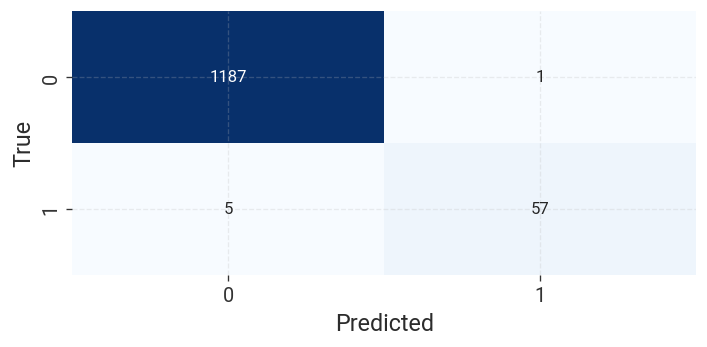

In [195]:
print(classification_report(y_test, predictions_gb))

conf_mat = confusion_matrix(y_test, predictions_gb)
print(conf_mat)

sns.heatmap(conf_mat, cmap='Blues', annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True');

/home/mustafa/miniconda3/envs/t2/lib/python3.13/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)
/home/mustafa/miniconda3/envs/t2/lib/python3.13/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)
/home/mustafa/miniconda3/envs/t2/lib/python3.13/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type pr

[F1]
Training Means: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Validation Means: [0.56694587 0.7781149  0.79013453 0.82526944 0.857952   0.86173771
 0.86750644 0.8695277  0.87899132 0.87996908]


[Precision]
Training Means: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Validation Means: [0.6752381  0.8475099  0.86413385 0.89194835 0.92281465 0.92017717
 0.92792599 0.93065131 0.95421083 0.94412879]


[Recall]
Training Means: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Validation Means: [0.52062589 0.7284495  0.73385491 0.76657183 0.79829303 0.81963016
 0.81963016 0.81948791 0.81906117 0.82432432]




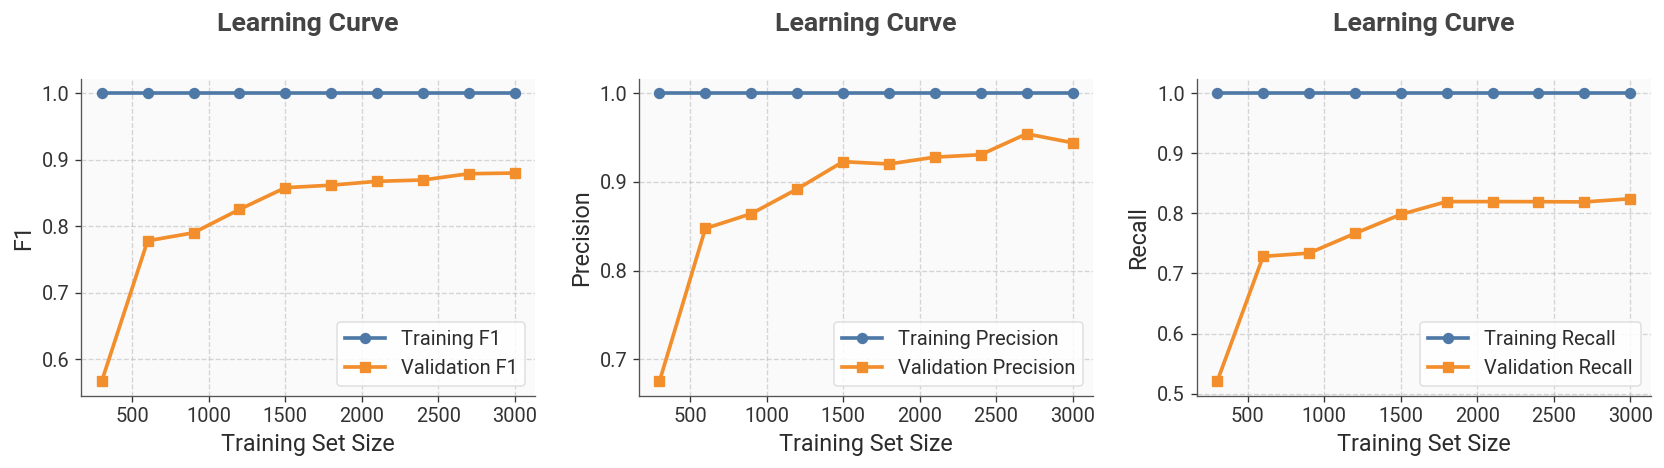

In [196]:
from my_utils.learnin_curve import plot_learning_curve
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

figure, axes = plt.subplots(1, 3, figsize=(14, 4))

for ax, (score_title, score_name) in zip(axes, zip( ['F1', 'Precision', 'Recall'], ['f1', 'precision', 'recall']) ):
    training_means, validation_means = plot_learning_curve(model=GradientBoostingClassifier(
        n_estimators=300,       # more trees
        learning_rate=0.05,     # smaller step size
        max_depth=3,            # shallower trees → less memorization
        min_samples_leaf=5,     # stops tiny splits
    ), X=X_train, y=y_train, cv=cv, scoring=f'{score_name}', label=f'{score_title}', ax=ax)

    print(f'[{score_title}]')
    print(f'Training Means: {training_means}')
    print(f'Validation Means: {validation_means}')
    print('\n')

figure.tight_layout()

Text(0, 0.5, '')

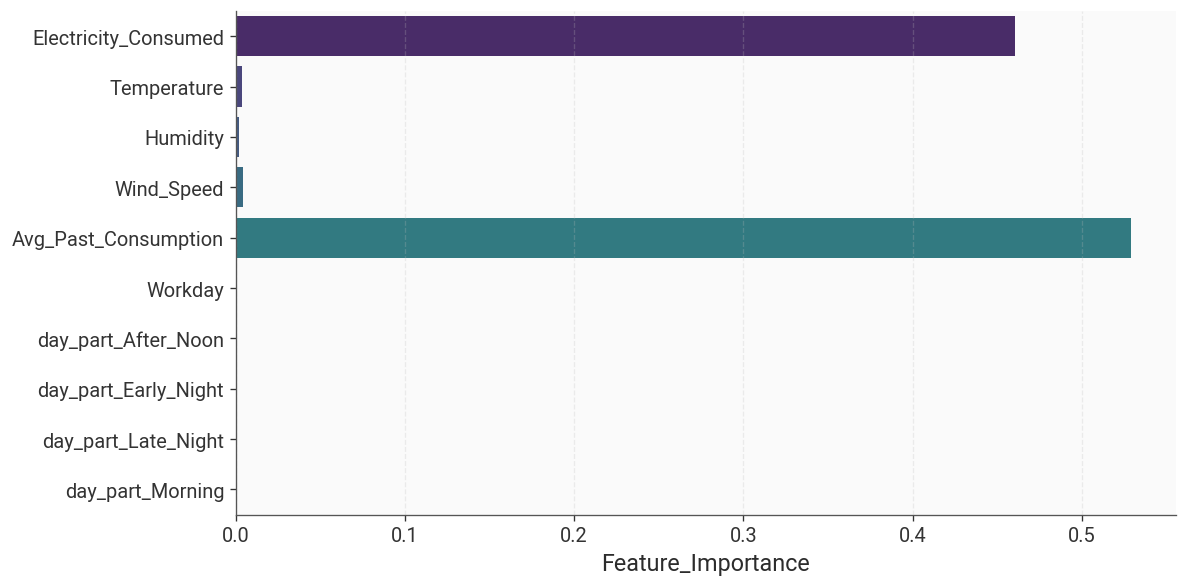

In [198]:
feature_importance = pd.DataFrame( grad_boost.feature_importances_ ,index=features.columns, columns=['Feature_Importance'])

plt.figure(figsize=(10, 5))
sns.barplot(data=feature_importance, x='Feature_Importance', y=feature_importance.index, palette='viridis', hue=feature_importance.index)
plt.ylabel('')